# Analysis to find if the average duration of movies has been declining.

### To find the project click [here](https://app.datacamp.com/workspace/w/dfc44e90-2151-48af-8a0e-d55c8a9b9b75)
### Index (click to redirect to section)
- [Loading data into a dictionary](#load-the-data)
- [Creating a dataframe from a dictionary](#create-dataframe)
- [A visual inspection of our data](#visual-inspection-data)
- [Loading the rest of the data from a CSV](#loading-csv)
- [Filtering for movies!](#filtering-for-movies)
- [Creating a scatter plot](#creating-scatterplot)
- [Digging deeper](#digging-deeper)
- [Marking non-feature films](#mark-non-feature-films)
- [Plotting with color!](#plotting-with-color)
- [Conclusion](#conclusion)

<a id="load-the-data"></a>
## Loading data into a dictionary

In [29]:
# Create the years and durations lists
years = [i for i in range(2011, 2021)]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years": years, "durations": durations}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


<a id="create-dataframe"></a>
## Creating a DataFrame from a dictionary

In [2]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


<a id='visual-inspection-data'></a>
## A visual inspection of our data

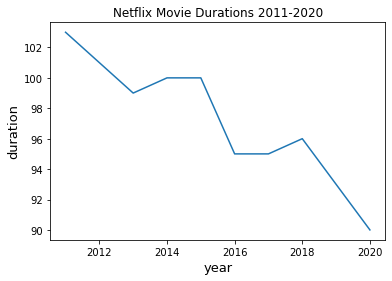

In [7]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years,durations)

# Create a title
plt.title('Netflix Movie Durations 2011-2020')
plt.xlabel("year", fontsize=13)
plt.ylabel("duration", fontsize=13)

# Show the plot
plt.show()


<a id='loading-csv'></a>
## Loading the rest of the data from a CSV

In [13]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv(
    "https://raw.githubusercontent.com/kaburia/Datasets_challenges/main/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


<a id='filtering-for-movies'></a>
## Filtering for movies!

In [18]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df.loc[netflix_df['type']=="Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head(5))

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


<a id='creating-scatterplot'></a>
## Creating a scatter plot

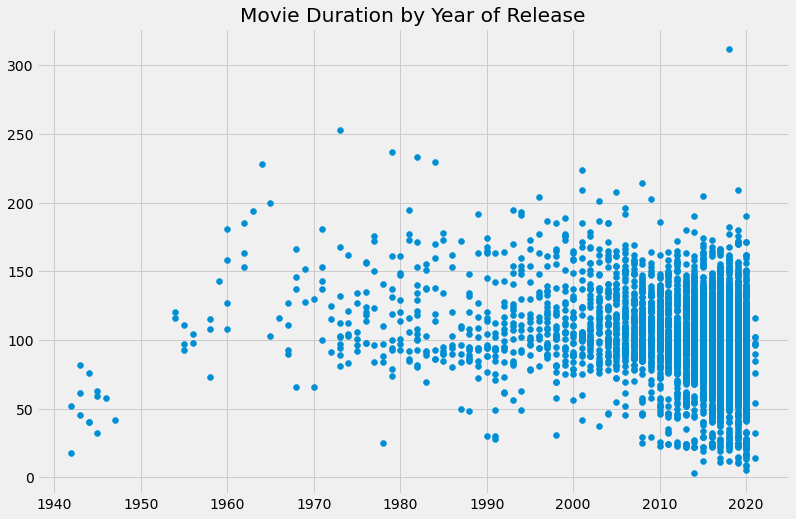

In [28]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12, 8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset.release_year,
            netflix_movies_col_subset.duration)

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()


<a id='digging-deeper'></a>
## Digging deeper

In [20]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset.loc[netflix_movies_col_subset.duration<60]

# Print the first 20 rows of short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Most of the films under an hour are Documentaries, Stand-ups or for children

<a id='mark-non-feature-films'></a>
## Marking non-feature films

In [32]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('black')

# Inspect the first 10 values in your list
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


<a id='plotting-with-color'></a>
## Plotting with color!

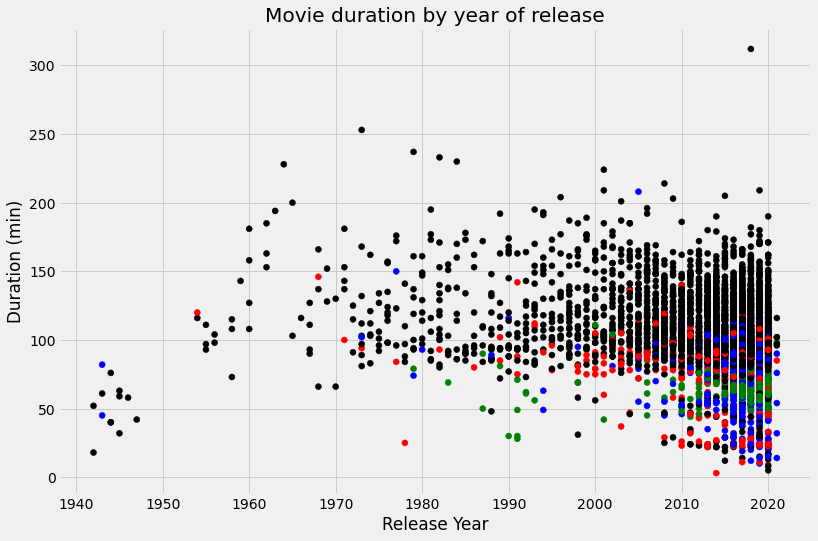

In [34]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset.release_year,netflix_movies_col_subset.duration,c=colors)

# Create a title and axis labels
plt.title('Movie duration by year of release')
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')

# Show the plot
plt.show()


<a id='conclusion'></a>
## Conclusion

Most of the Documentaries, Stand-ups and movies for children are of duration lower than an hour. It does not look like movies are getting shorter. The shorter movie genres are more predominant now than earlier. 